In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

data_fldr = "/l/mesur/aedinge/distortion_polarization/"

user_cts = pd.read_csv(data_fldr + "231127_user_cts.csv")
ideology_2016 = pd.read_csv(data_fldr + "ideology_estimates_2016_paper.csv")
ideology_2020 = pd.read_csv(data_fldr + "ideology_estimates_2020_paper.csv")

ideology_2016 = ideology_2016.rename(columns={'account_id': 'user_id', 'est':'2016_est'})
ideology_2020 = ideology_2020.rename(columns={'account_id': 'user_id', 'est':'2020_est'})

In [2]:
df_all = pd.merge(user_cts, ideology_2016, on='user_id')
df_all = pd.merge(df_all, ideology_2020, on='user_id')

df_all['2016_prev'] = df_all['2016_distortion']/df_all['2016_total']
df_all['2020_prev'] = df_all['2020_distortion']/df_all['2020_total']

df_all['pr'] = df_all['2020_prev']/df_all['2016_prev']

In [8]:
df_all

,user_id,2016_distortion,2016_total,2020_distortion,2020_total,2016_prevalence,2020_prevalence,2016_est,type_x,2020_est,type_y,2016_prev,2020_prev,pr
0,394264593,3,13,8,39,0.230769,0.205128,-0.375493,users,-0.710873,users,0.230769,0.205128,0.888889
1,241172528,14,33,7,15,0.424242,0.466667,1.136110,users,1.240828,users,0.424242,0.466667,1.100000
2,2400190518,14,80,24,102,0.175000,0.235294,-1.127296,users,-0.789982,users,0.175000,0.235294,1.344538
3,202375229,6,15,3,21,0.400000,0.142857,-0.922624,users,-0.545495,users,0.400000,0.142857,0.357143
4,14680172,20,83,107,255,0.240964,0.419608,-0.950418,users,-0.814901,users,0.240964,0.419608,1.741373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53488,91226005,2,23,12,34,0.086957,0.352941,-0.890635,users,-0.797109,users,0.086957,0.352941,4.058824
53489,14679970,3,12,4,15,0.250000,0.266667,1.329491,users,1.317946,users,0.250000,0.266667,1.066667
53490,29360052,3,25,1,36,0.120000,0.027778,-1.041295,users,-0.827372,users,0.120000,0.027778,0.231481
53491,99614652,6,16,8,23,0.375000,0.347826,-0.131599,users,-0.613590,users,0.375000,0.347826,0.927536


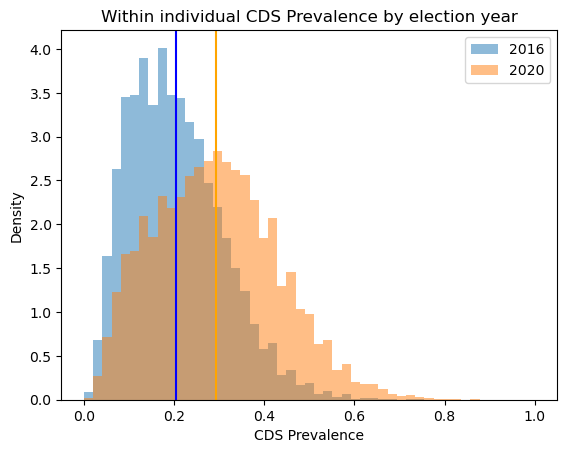

0.20399187616075068 0.2919642644024863
1.4312543709947114


In [14]:
bins = np.linspace(0, 1, 50)

plt.hist(df_all['2016_prevalence'], bins, density=True, alpha=0.5, label='2016')
plt.axvline(x=df_all['2016_prevalence'].mean(), color='blue')

plt.hist(df_all['2020_prevalence'], bins, density=True, alpha=0.5, label='2020')
plt.axvline(x=df_all['2020_prevalence'].mean(), color='orange')

plt.title("Within individual CDS Prevalence by election year")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

print(df_all['2016_prevalence'].mean(), df_all['2020_prevalence'].mean())
print(df_all['2020_prevalence'].mean()/df_all['2016_prevalence'].mean())

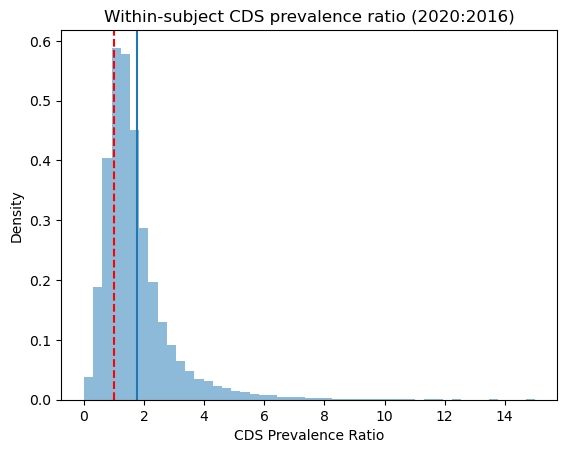

1.7508423871190497


In [11]:
bins = np.linspace(0, 15, 50)

plt.hist((df_all['2020_prevalence']/df_all['2016_prevalence']), bins, density=True, alpha=0.5, label='Prevalence Ration (2020/2016)')
# plt.legend(loc='upper right')
plt.axvline(x=(df_all['2020_prevalence']/df_all['2016_prevalence']).mean())
plt.axvline(x=1, color='r', ls='--')
plt.title("Within-subject CDS prevalence ratio (2020:2016)")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence Ratio")
plt.show()

print((df_all['2020_prevalence']/df_all['2016_prevalence']).mean())

In [28]:
from scipy import stats

# get users that remain on the right or left for both 2016 and 2020
df_l = pd.DataFrame(df_all[(df_all['2016_est'] < -0.5) & (df_all['2020_est'] < -0.5)][['user_id', '2016_est', '2020_est', 'pr']])
df_r = pd.DataFrame(df_all[(df_all['2016_est'] > 0.5) & (df_all['2020_est'] > 0.5)][['user_id', '2016_est', '2020_est', 'pr']])

# z-score ideology values (take negative of users on the left)
df_l['2016_z'] = abs(-1*stats.zscore(df_l['2016_est']))
df_l['2020_z'] = abs(-1*stats.zscore(df_l['2020_est']))
df_r['2016_z'] = abs(stats.zscore(df_r['2016_est']))
df_r['2020_z'] = abs(stats.zscore(df_r['2020_est']))

# get change in z score
df_l['d_z'] = (df_l['2020_z'] / df_l['2016_z'])
df_r['d_z'] = (df_r['2020_z'] / df_r['2016_z'])



Correlation (Left):  -0.014575237363175425
Correlation (Right):  0.0018789765142833495


(0.0, 10.0)

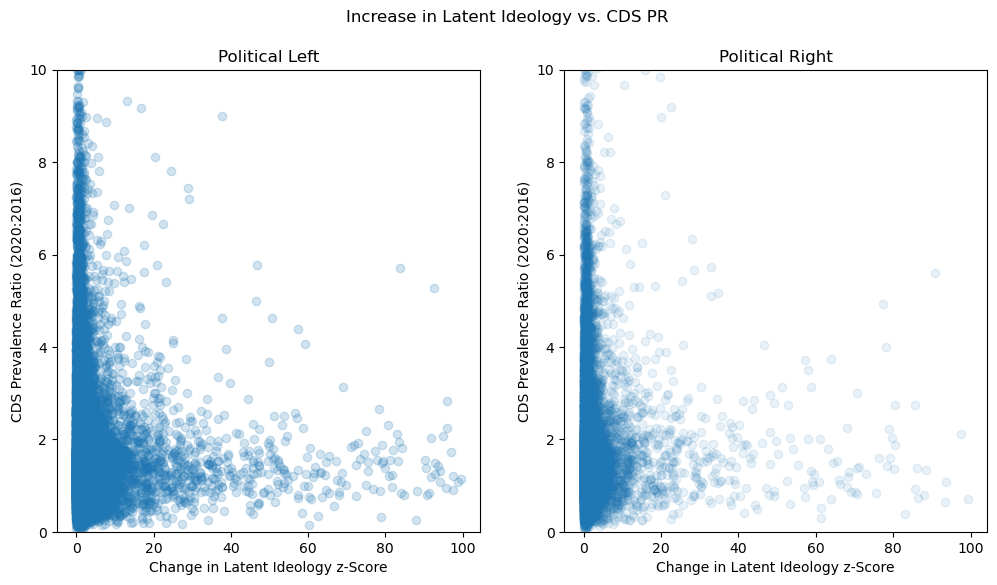

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle("Increase in Latent Ideology vs. CDS PR")

d_lim = 100


# left
data = df_l[df_l['d_z'] < d_lim]
print("Correlation (Left): ", data['d_z'].corr(data['pr']))

ax1.scatter(x=data['d_z'], y=data['pr'], alpha = 0.2)

ax1.set_title("Political Left")
ax1.set_xlabel("Change in Latent Ideology z-Score")
ax1.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax1.set_ylim([0,10])


# right
data = df_r[df_r['d_z'] < d_lim]

print("Correlation (Right): ", data['d_z'].corr(data['pr']))

ax2.scatter(x=data['d_z'], y=data['pr'], alpha = 0.1)

ax2.set_title("Political Right")
ax2.set_xlabel("Change in Latent Ideology z-Score")
ax2.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax2.set_ylim([0,10])

# ax1.set_yscale('log')
# ax1.set_xscale('log')

# ax2.set_yscale('log')
# ax2.set_xscale('log')



# ax2.plot(x, -y)

AttributeError: Line2D.set() got an unexpected keyword argument 'figsize'

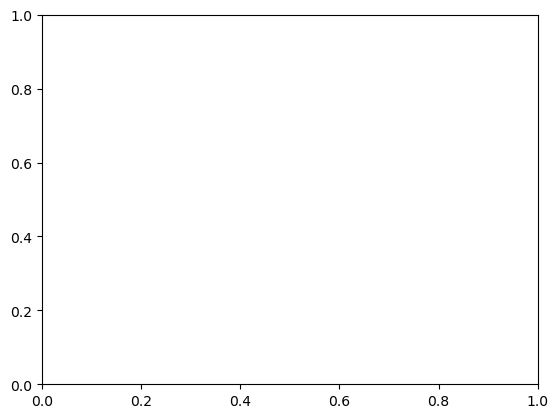

In [19]:
fig, ax1 = plt.plot(1, 2, figsize=(12, 6))

fig = plt.figure()
ax = plt.scatter(x=data['d_z'], y=data['pr'], alpha = 0.2)
ax.plot(data['o_value'] ,data['time_diff_day'], 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

plt.suptitle("Increase in Latent Ideology vs. CDS PR")

d_lim = 100


# left
data = df_l[df_l['d_z'] < d_lim]
print("Correlation (Left): ", data['d_z'].corr(data['pr']))

ax1.scatter(x=data['d_z'], y=data['pr'], alpha = 0.2)

ax1.set_title("Political Left")
ax1.set_xlabel("Change in Latent Ideology z-Score")
ax1.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax1.set_ylim([0,10])


# right
data = df_r[df_r['d_z'] < d_lim]

print("Correlation (Right): ", data['d_z'].corr(data['pr']))

ax2.scatter(x=data['d_z'], y=data['pr'], alpha = 0.1)

ax2.set_title("Political Right")
ax2.set_xlabel("Change in Latent Ideology z-Score")
ax2.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax2.set_ylim([0,10])

ax1.set_yscale('log')
ax2.set_yscale('log')


# ax2.plot(x, -y)

(0.0, 10.0)

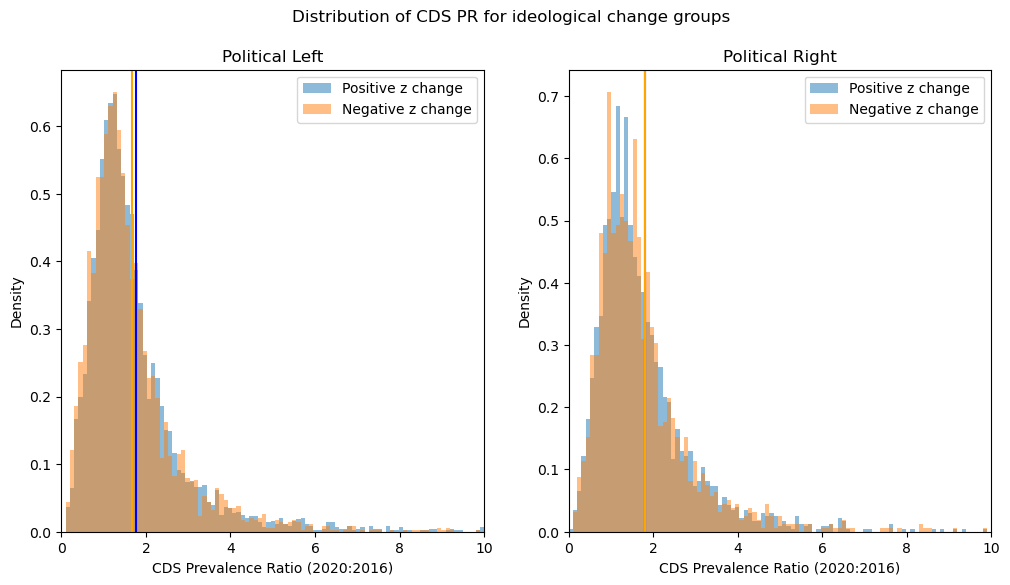

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle("Distribution of CDS PR for ideological change groups")

d_lim = 1

bins = np.linspace(0, 10, 100)

# left

data = df_l[df_l['d_z'] > d_lim]

ax1.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Positive z change')
ax1.axvline(x=data['pr'].mean(), color='blue')

data = df_l[df_l['d_z'] < -1 * d_lim]

ax1.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Negative z change')
ax1.axvline(x=data['pr'].mean(), color='orange')

# plt.legend(loc='upper right')
ax1.set_title("Political Left")
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence Ratio (2020:2016)")
ax1.legend(loc='upper right')
ax1.set_xlim([0,10])

# right

bins = np.linspace(0, 10, 100)

data = df_r[df_r['d_z'] > d_lim]

ax2.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Positive z change')
ax2.axvline(x=data['pr'].mean(), color='blue')

data = df_r[df_r['d_z'] < -1 * d_lim]

ax2.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Negative z change')
ax2.axvline(x=data['pr'].mean(), color='orange')

# plt.legend(loc='upper right')
ax2.set_title("Political Right")
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence Ratio (2020:2016)")
ax2.legend(loc='upper right')
ax2.set_xlim([0,10])

In [6]:
lr = df_all[(df_all['2016_est'] < -0.5) & (df_all['2020_est'] > 0.5)]
rl = df_all[(df_all['2016_est'] > 0.5) & (df_all['2020_est'] < -0.5)]

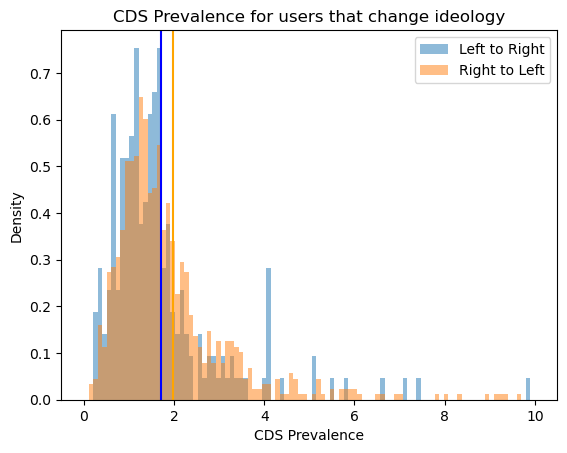

In [7]:
lr = df_all[(df_all['2016_est'] < -0.5) & (df_all['2020_est'] > 0.5)]
rl = df_all[(df_all['2016_est'] > 0.5) & (df_all['2020_est'] < -0.5)]

bins = np.linspace(0, 10, 100)

plt.hist(lr['pr'], bins, density=True, alpha=0.5, label='Left to Right')
plt.axvline(x=lr['pr'].mean(), color='blue')

plt.hist(rl['pr'], bins, density=True, alpha=0.5, label='Right to Left')
plt.axvline(x=rl['pr'].mean(), color='orange')

plt.title("CDS Prevalence for users that change ideology")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

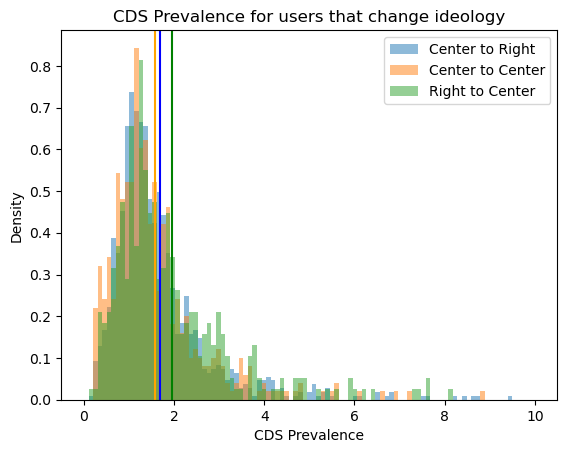

In [9]:
c_r = df_all[(df_all['2016_est'] > -0.5) & (df_all['2016_est'] < 0.5) & (df_all['2020_est'] > 0.5)]
c_c = df_all[(df_all['2016_est'] > -0.5) & (df_all['2016_est'] < 0.5) & (df_all['2020_est'] > -0.5) & (df_all['2020_est'] < 0.5)]
r_c = df_all[(df_all['2020_est'] > -0.5) & (df_all['2020_est'] < 0.5) & (df_all['2016_est'] > 0.5)]


bins = np.linspace(0, 10, 100)

plt.hist(c_r['pr'], bins, density=True, alpha=0.5, label='Center to Right')
plt.axvline(x=c_r['pr'].mean(), color='blue')

plt.hist(c_c['pr'], bins, density=True, alpha=0.5, label='Center to Center')
plt.axvline(x=c_c['pr'].mean(), color='orange')

plt.hist(r_c['pr'], bins, density=True, alpha=0.5, label='Right to Center')
plt.axvline(x=r_c['pr'].mean(), color='green')

plt.title("CDS Prevalence for users that change ideology")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

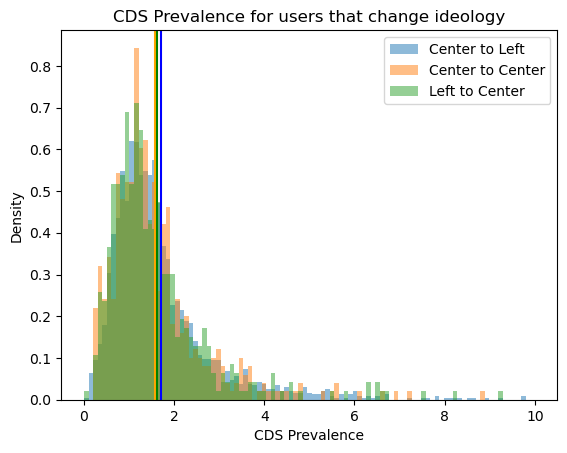

In [10]:
c_l = df_all[(df_all['2016_est'] > -0.5) & (df_all['2016_est'] < 0.5) & (df_all['2020_est'] < -0.5)]
c_c = df_all[(df_all['2016_est'] > -0.5) & (df_all['2016_est'] < 0.5) & (df_all['2020_est'] > -0.5) & (df_all['2020_est'] < 0.5)]
l_c = df_all[(df_all['2020_est'] > -0.5) & (df_all['2020_est'] < 0.5) & (df_all['2016_est'] < -0.5)]


bins = np.linspace(0, 10, 100)

plt.hist(c_l['pr'], bins, density=True, alpha=0.5, label='Center to Left')
plt.axvline(x=c_l['pr'].mean(), color='blue')

plt.hist(c_c['pr'], bins, density=True, alpha=0.5, label='Center to Center')
plt.axvline(x=c_c['pr'].mean(), color='orange')

plt.hist(l_c['pr'], bins, density=True, alpha=0.5, label='Left to Center')
plt.axvline(x=l_c['pr'].mean(), color='green')

plt.title("CDS Prevalence for users that change ideology")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

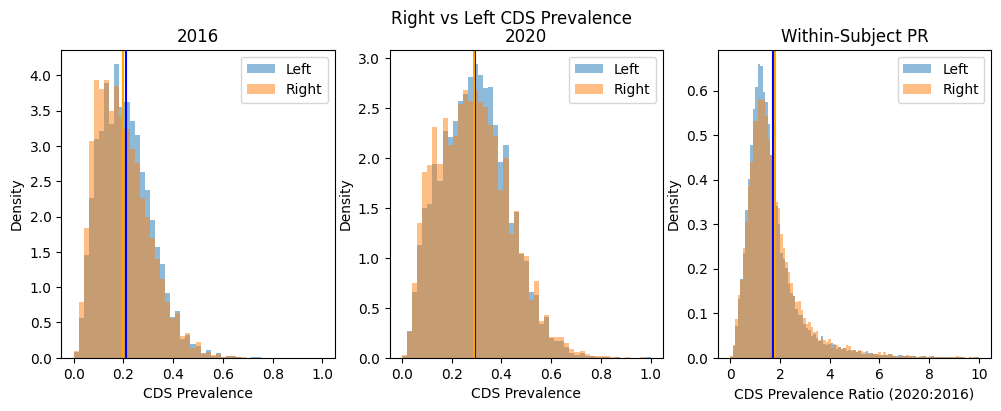

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

plt.suptitle("Right vs Left CDS Prevalence")

i_lim = 0.5
bins = np.linspace(0,1,50)

# 2016
year = 2016

# left
ax1.hist(df_all[df_all[f'{year}_est'] < -1*i_lim][f'{year}_prevalence'], density=True, bins=bins, alpha=0.5, label='Left')
ax1.axvline(x=df_all[df_all[f'{year}_est'] < -1*i_lim][f'{year}_prevalence'].mean(), color='blue')

# right
ax1.hist(df_all[df_all[f'{year}_est'] > i_lim][f'{year}_prevalence'], density=True, bins=bins, alpha=0.5, label='Right')
ax1.axvline(x=df_all[df_all[f'{year}_est'] > i_lim][f'{year}_prevalence'].mean(), color='orange')

# plt.legend(loc='upper right')
ax1.set_title(year)
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')

# 2020
year = 2020

# left
ax2.hist(df_all[df_all[f'{year}_est'] < -1*i_lim][f'{year}_prevalence'], density=True, bins=bins, alpha=0.5, label='Left')
ax2.axvline(x=df_all[df_all[f'{year}_est'] < -1*i_lim][f'{year}_prevalence'].mean(), color='blue')

# right
ax2.hist(df_all[df_all[f'{year}_est'] > i_lim][f'{year}_prevalence'], density=True, bins=bins, alpha=0.5, label='Right')
ax2.axvline(x=df_all[df_all[f'{year}_est'] > i_lim][f'{year}_prevalence'].mean(), color='orange')

# plt.legend(loc='upper right')
ax2.set_title(year)
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')

# within-subject PR

bins = np.linspace(0,10,100)

# left
data = df_all[(df_all['2016_est'] < -1*i_lim) & (df_all['2020_est'] < -1*i_lim)]

ax3.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Left')
ax3.axvline(x=data['pr'].mean(), color='blue')

# right
data = df_all[(df_all['2016_est'] > i_lim) & (df_all['2020_est'] > i_lim)]

ax3.hist(data['pr'], density=True, bins=bins, alpha=0.5, label='Right')
ax3.axvline(x=data['pr'].mean(), color='orange')

# plt.legend(loc='upper right')
ax3.set_title("Within-Subject PR")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio (2020:2016)")
ax3.legend(loc='upper right')